In [3]:
print ("Hello Chapter 3")

Hello Chapter 3


In [4]:
import fastbook
fastbook.setup_book()

In [5]:
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

In [6]:
path = untar_data(URLs.MNIST_SAMPLE)
Path.BASE_PATH = path

In [7]:
print (Path.BASE_PATH)
path.ls()
(path/'train').ls()

C:\Users\giris\.fastai\data\mnist_sample


(#2) [Path('train/3'),Path('train/7')]

In [8]:
threes = (path/'train'/'3').ls().sorted()
seven = (path/'train'/'7').ls().sorted()

In [9]:
im3_path = threes[0]
im3 = Image.open(im3_path)
im3

In [10]:
# Convert the image to a numpy array
im3_np = np.array(im3)
im3_np[10:20, 10:20]

array([[  0,   0,   0,  24, 209, 254, 254, 254, 171,   0],
       [  0,   0,  91, 137, 253, 254, 254, 254, 112,   0],
       [ 40, 214, 250, 254, 254, 254, 254, 254,  34,   0],
       [ 81, 247, 254, 254, 254, 254, 254, 254, 146,   0],
       [  0, 110, 246, 254, 254, 254, 254, 254, 171,   0],
       [  0,   0,  73,  89,  89,  93, 240, 254, 171,   0],
       [  0,   0,   0,   0,   0,   1, 128, 254, 219,  31],
       [  0,   0,   0,   0,   0,   7, 254, 254, 214,  28],
       [  0,   0,   0,   0,   0, 138, 254, 254, 116,   0],
       [  0,   0,   0,   0,  25, 240, 254, 254,  34,   0]], dtype=uint8)

In [11]:
im3_t = tensor(im3_np)
df = pd.DataFrame(im3_t[5:20,10:20])
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9
0,103,242,254,254,254,254,254,66,0,0
1,18,232,254,254,254,254,254,238,70,0
2,0,104,244,254,224,254,254,254,141,0
3,0,0,207,254,210,254,254,254,34,0
4,0,0,84,206,254,254,254,254,41,0
5,0,0,0,24,209,254,254,254,171,0
6,0,0,91,137,253,254,254,254,112,0
7,40,214,250,254,254,254,254,254,34,0
8,81,247,254,254,254,254,254,254,146,0
9,0,110,246,254,254,254,254,254,171,0


In [12]:
sevens_tensor = [tensor(Image.open(o)) for o in seven]
threes_tensor = [tensor(Image.open(o)) for o in threes]
len(threes_tensor), len(sevens_tensor)


(6131, 6265)

<Axes: >

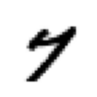

In [13]:
show_image(sevens_tensor[1])

In [14]:
sevens_tensor[0].shape

torch.Size([28, 28])

In [15]:
# Transform the image values to a float in the range [0, 1]
stacked_sevens_tensor = torch.stack(sevens_tensor).float() / 255
stacked_threes_tensor = torch.stack(threes_tensor).float() / 255
stacked_threes_tensor.shape, stacked_sevens_tensor.shape

(torch.Size([6131, 28, 28]), torch.Size([6265, 28, 28]))

In [16]:
# Length of a tensor is always the rank
len(stacked_threes_tensor.shape), len(stacked_sevens_tensor.shape)

(3, 3)

In [17]:
# Length of a tensor is the number of vectors in the first dimension 
# in this case the number of vectors of size 28 x 28
len(stacked_threes_tensor), len(stacked_threes_tensor)

(6131, 6131)

In [18]:
stacked_sevens_tensor.ndim

3

In [19]:
# Since all the images are scaled, we are going to compute a mean to look at an ideal image
mean_sevens = stacked_sevens_tensor.mean(dim=0)
mean_sevens[10:15, 10:15]


tensor([[0.5665, 0.5484, 0.5018, 0.4607, 0.4396],
        [0.3799, 0.3198, 0.2511, 0.2084, 0.2000],
        [0.2257, 0.1553, 0.0952, 0.0710, 0.0905],
        [0.1261, 0.0682, 0.0358, 0.0326, 0.0805],
        [0.0711, 0.0433, 0.0331, 0.0472, 0.1342]])

In [20]:
mean_threes = stacked_threes_tensor.mean(dim=0)
mean_threes[10:15, 10:15]
#mean_threes.shape

tensor([[0.0952, 0.1253, 0.1803, 0.2742, 0.4027],
        [0.1396, 0.2331, 0.3551, 0.4887, 0.6099],
        [0.2776, 0.4349, 0.5836, 0.7028, 0.7715],
        [0.3944, 0.5657, 0.6985, 0.7672, 0.7795],
        [0.3902, 0.5216, 0.6026, 0.6287, 0.6276]])

<Axes: >

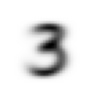

In [21]:
show_image(mean_threes)

<Axes: >

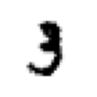

In [22]:
show_image(stacked_threes_tensor[0])

In [23]:
# L1 Norm - absolute difference between the two tensors -
# Available in pytorch as toch.nn.functional which is imported as F
F.l1_loss(mean_threes, mean_sevens)


tensor(0.1069)

In [24]:
# MSE - Mean Squared Error is also available in pytorch functional
F.mse_loss(mean_threes, mean_sevens)

tensor(0.0349)

In [25]:
#Create a validation set
validation_3_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'3').ls().sorted()]).float() / 255
validation_7_tensor = torch.stack([tensor(Image.open(o)) for o in (path/'valid'/'7').ls().sorted()]).float() / 255

In [60]:
validation_3_tensor.shape, validation_7_tensor.shape, validation_3_tensor.ndim


(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]), 3)

In [69]:
def mnist_distance(t1, t2):
    "Compute the distance between two MNIST tensors"
    return (t1 - t2).abs().mean((-1,-2))

In [70]:
valid_mnist_method = mnist_distance(validation_3_tensor,mean_threes)
validation_3_tensor.shape

torch.Size([1010, 28, 28])

In [ ]:
def is_3(x):
    "Check if the distance is less than 0.1"
    return mnist_distance(x, mean_threes) < mnist_distance(x, mean_sevens)